In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import calendar
import statsmodels.formula.api as sm

In [3]:
features_df=pd.read_csv("features.csv")
stores_df=pd.read_csv("stores.csv")
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

In [4]:
features_df.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [5]:
seasons_dict={
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter",
}

In [6]:
master_df = train_df.merge(stores_df,on='Store',how='left')
master_df = master_df.merge(features_df,on =['Store','Date'],how='left')

In [7]:
master_df.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  2010-02-05      24924.50        False    A  151315   
1      1     1  2010-02-12      46039.49         True    A  151315   
2      1     1  2010-02-19      41595.55        False    A  151315   
3      1     1  2010-02-26      19403.54        False    A  151315   
4      1     1  2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.242170         8.106         True  
2        NaN  211.289143         8.106        False  
3        NaN  211.319643         8.106        False  
4        NaN  211.350143         8.106        False

In [8]:
master_df['MarkDown1']=master_df['MarkDown1'].fillna(0)
master_df['MarkDown2']=master_df['MarkDown2'].fillna(0)
master_df['MarkDown3']=master_df['MarkDown3'].fillna(0)
master_df['MarkDown4']=master_df['MarkDown4'].fillna(0)
master_df['MarkDown5']=master_df['MarkDown5'].fillna(0)
master_df['Holiday']=master_df['IsHoliday_x']
master_df=master_df.drop(columns=['IsHoliday_x','IsHoliday_y'])
master_df['Date']=pd.to_datetime(master_df['Date'],format='%Y-%m-%d')
master_df['Week_Number']=master_df['Date'].dt.isocalendar().week
master_df['Quarter']=master_df['Date'].dt.quarter
master_df['Month']=master_df['Date'].dt.month.apply(lambda x : calendar.month_abbr[x])
master_df['Season']=(master_df['Date'].apply(lambda dt:(dt.month)).map(seasons_dict))

In [9]:
master_df.head(2)


Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   

   Unemployment  Holiday  Week_Number  Quarter Month  Season  
0         8.106    False            5        1   Feb  Winter  
1         8.106     True            6        1   Feb  Winter

In [10]:
uint_cols = master_df.select_dtypes(include='UInt32').columns
master_df[uint_cols] = master_df[uint_cols].astype('float64')
result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1)]).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.290
Date:                Wed, 29 Mar 2023   Prob (F-statistic):              0.223
Time:                        09:21:58   Log-Likelihood:            -1.1933e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10232   BIC:                         2.388e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.766e-07    2.2e-06     

In [11]:
master_df.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.933000       0.000000       0.000000   
50%        62.090000       3.452000       0.000000       0.000000   
75%        74.280000       3.738000    2809.050000       2.200000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      468.087665    1083.132268    1662.772385     171.201947   
std      5528.873453    3894.529945    4207.629321      39.159276   
min       -29.100000       0.000000       0.000000     126.064000   
25%         0.000000       0.000000       0.000000     132.022667   
50%         0.000000       0.000000       0.000000     182.318780   
75%         4.540000     425.290000    2168.040000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment    Week_Number        Quarter  
count  421570.000000  421570.000000  421570.000000  
mean        7.960289      25.826762       2.482767  
std         1.863296      14.151887       1.071341  
min         3.879000       1.000000       1.000000  
25%         6.891000      14.000000       2.000000  
50%         7.866000      26.000000       2.000000  
75%         8.572000      38.000000       3.000000  
max        14.313000      52.000000       4.000000

In [12]:
result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 3)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 4)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 5)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 6)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.290
Date:                Wed, 29 Mar 2023   Prob (F-statistic):              0.223
Time:                        09:21:59   Log-Likelihood:            -1.1933e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10232   BIC:                         2.388e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.766e-07    2.2e-06     

In [13]:
master_df[(master_df['Store']==2) & (master_df['Quarter']==1)].describe()

Store         Dept   Weekly_Sales      Size  Temperature   Fuel_Price  \
count  2382.0  2382.000000    2382.000000    2382.0  2382.000000  2382.000000   
mean      2.0    44.368598   26431.802502  202307.0    50.725277     3.156288   
std       0.0    29.848268   32874.327031       0.0     9.485458     0.388484   
min       2.0     1.000000    -219.000000  202307.0    33.020000     2.514000   
25%       2.0    20.000000    5156.252500  202307.0    43.820000     2.976000   
50%       2.0    38.000000   14382.705000  202307.0    51.260000     3.157000   
75%       2.0    72.000000   31617.785000  202307.0    57.770000     3.473000   
max       2.0    99.000000  195482.730000  202307.0    69.420000     3.845000   

          MarkDown1     MarkDown2    MarkDown3     MarkDown4     MarkDown5  \
count   2382.000000   2382.000000  2382.000000   2382.000000   2382.000000   
mean    5957.948917   2879.997305    24.010302   2892.784404   2258.577242   
std    13675.544343   7187.989125    50.172502   8609.061039   3227.971071   
min        0.000000      0.000000     0.000000      0.000000      0.000000   
25%        0.000000      0.000000     0.000000      0.000000      0.000000   
50%        0.000000      0.000000     0.000000      0.000000      0.000000   
75%     6008.980000   1507.560000    10.200000   1703.100000   4245.600000   
max    75149.790000  37454.290000   221.400000  48159.860000  10380.030000   

               CPI  Unemployment  Week_Number  Quarter  
count  2382.000000   2382.000000  2382.000000   2382.0  
mean    215.171138      7.719994     7.178002      1.0  
std       4.133869      0.544025     3.419472      0.0  
min     210.676610      7.057000     1.000000      1.0  
25%     211.064888      7.057000     5.000000      1.0  
50%     213.477531      8.028000     7.000000      1.0  
75%     219.811885      8.028000    10.000000      1.0  
max     220.999125      8.324000    13.000000      1.0

In [14]:
master_df.describe()


Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.933000       0.000000       0.000000   
50%        62.090000       3.452000       0.000000       0.000000   
75%        74.280000       3.738000    2809.050000       2.200000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      468.087665    1083.132268    1662.772385     171.201947   
std      5528.873453    3894.529945    4207.629321      39.159276   
min       -29.100000       0.000000       0.000000     126.064000   
25%         0.000000       0.000000       0.000000     132.022667   
50%         0.000000       0.000000       0.000000     182.318780   
75%         4.540000     425.290000    2168.040000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment    Week_Number        Quarter  
count  421570.000000  421570.000000  421570.000000  
mean        7.960289      25.826762       2.482767  
std         1.863296      14.151887       1.071341  
min         3.879000       1.000000       1.000000  
25%         6.891000      14.000000       2.000000  
50%         7.866000      26.000000       2.000000  
75%         8.572000      38.000000       3.000000  
max        14.313000      52.000000       4.000000

In [15]:
week_array=[]
store_array=[]

for i in range(1,46):
    store_array.append(i)
total_stores_sales = {}

for i in range(1,46):
    week_array.append(i)
    current_store_array =[]
    for j in range(1,53):
        current_dp = master_df[(master_df['Store'] == i) & (master_df['Week_Number']==j)]
        sales_array=current_dp['Weekly_Sales'].tolist()
        sum_sales=0
        for k in range(1,len(sales_array)):
            sum_sales = sum_sales + sales_array[k]
        current_store_array.append(sum_sales)
    total_stores_sales[i] = current_store_array

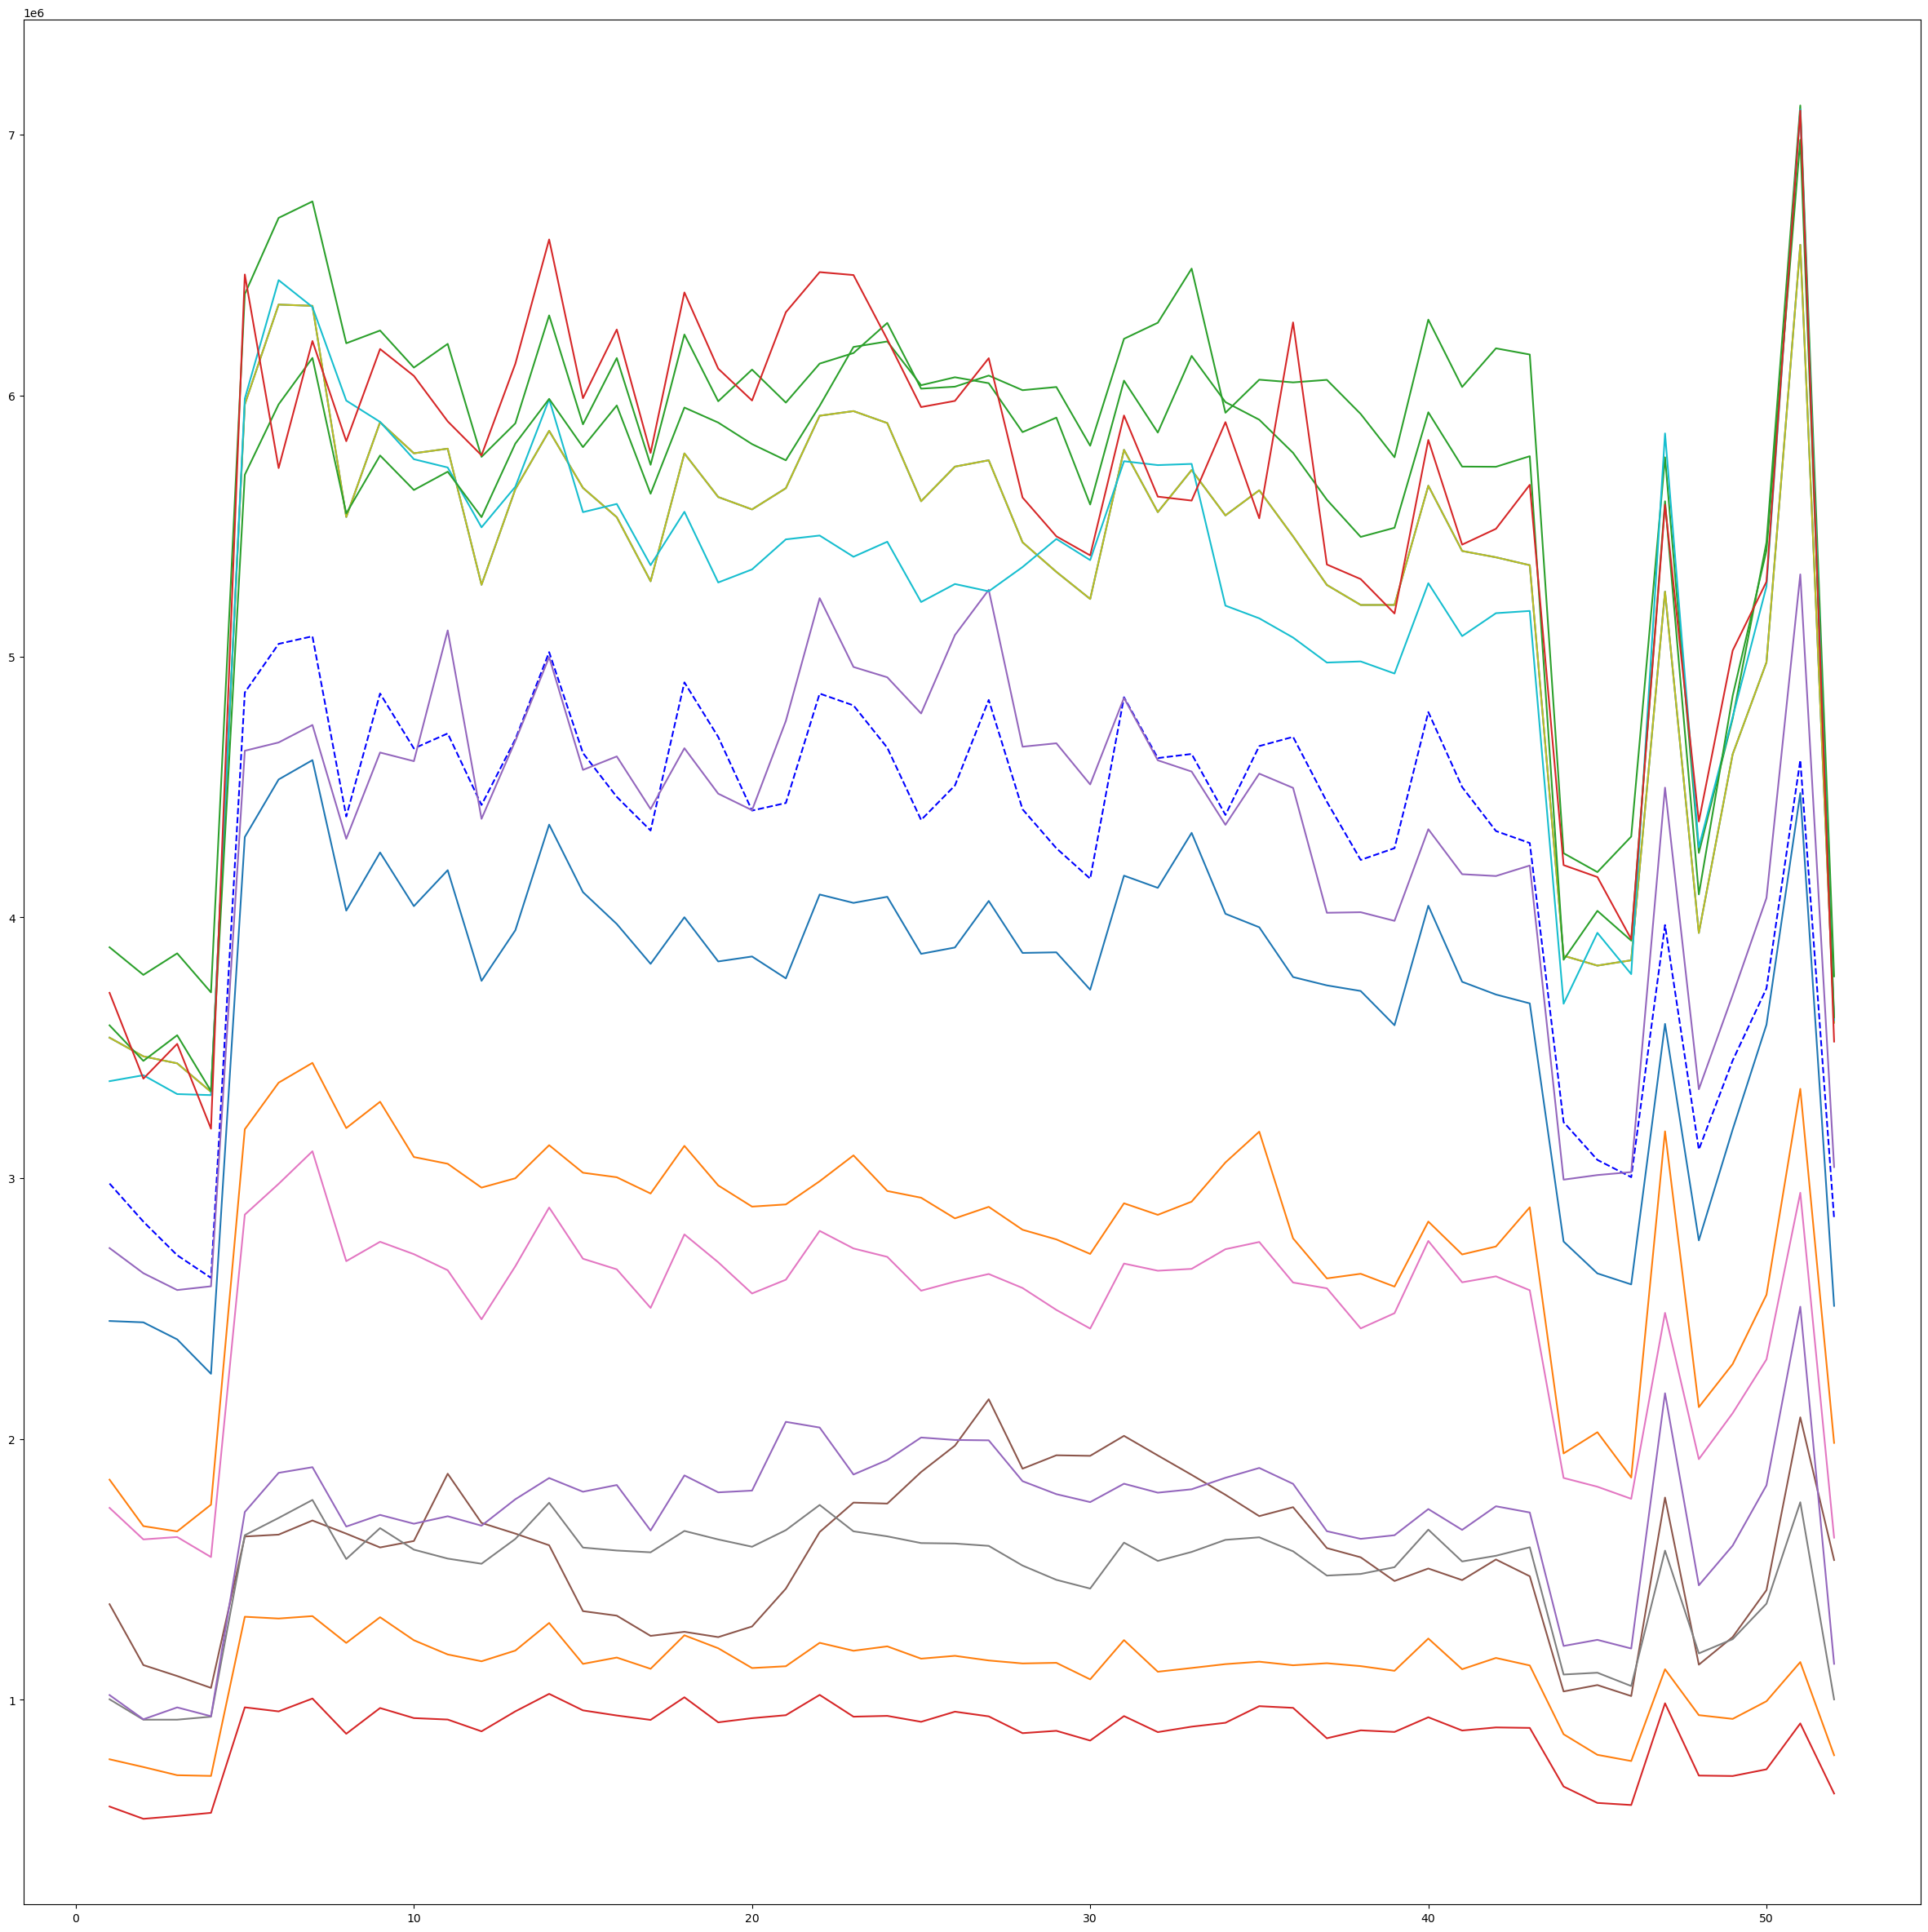

In [16]:
week_array =[]
for i in range (1,53):
    week_array.append(i)

plt.plot(week_array,total_stores_sales[1],"b--")
plt.plot(week_array,total_stores_sales[2])
plt.plot(week_array,total_stores_sales[3])
plt.plot(week_array,total_stores_sales[4])
plt.plot(week_array,total_stores_sales[5])
plt.plot(week_array,total_stores_sales[6])
plt.plot(week_array,total_stores_sales[7])
plt.plot(week_array,total_stores_sales[8])
plt.plot(week_array,total_stores_sales[9])
plt.plot(week_array,total_stores_sales[2])
plt.plot(week_array,total_stores_sales[10])
plt.plot(week_array,total_stores_sales[11])
plt.plot(week_array,total_stores_sales[12])
plt.plot(week_array,total_stores_sales[13])
plt.plot(week_array,total_stores_sales[14])
plt.plot(week_array,total_stores_sales[15])

fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [17]:
total_stores_sales


{1: [2979117.9600000004,
  2833255.4299999992,
  2704457.789999999,
  2617763.72,
  4861735.630000002,
  5048010.310000001,
  5077085.3999999985,
  4386512.160000001,
  4857662.949999999,
  4647120.990000001,
  4704669.99,
  4430371.160000001,
  4682379.229999999,
  5016393.850000002,
  4629382.0200000005,
  4461508.449999999,
  4332564.659999999,
  4900452.450000001,
  4691196.39,
  4409009.170000001,
  4437980.739999998,
  4857522.609999999,
  4812102.750000001,
  4649789.65,
  4373058.840000002,
  4505044.58,
  4833089.22,
  4413922.089999998,
  4264586.329999998,
  4147948.2800000017,
  4843502.910000001,
  4610258.42,
  4625969.840000001,
  4392164.89,
  4656234.370000001,
  4691504.519999999,
  4442713.090000001,
  4219814.840000002,
  4264856.400000001,
  4786627.819999998,
  4499029.5,
  4330542.510000001,
  4284477.119999998,
  3214649.980000002,
  3069868.9899999998,
  3003715.0399999977,
  3970124.4799999995,
  3109600.1700000004,
  3450798.9899999993,
  3727298.74,
  460220

In [18]:
print(total_stores_sales[1][1])

2833255.4299999992


In [19]:
weekly_total_array=[]

for i in range(52):
    weekly_sum=0
    for j in range (1,46):
        weekly_sum=weekly_sum + total_stores_sales[j][i]
    weekly_total_array.append(weekly_sum)

print(weekly_total_array)
    

[87207935.44000001, 82123863.94999997, 82111755.27, 78782339.45, 141107626.29999998, 144225095.94000003, 146071957.49999994, 133184545.96, 139950456.44, 137229283.09, 135916119.07999998, 130958230.25999998, 136703731.92999998, 145236126.29000002, 136176536.90999997, 137895177.51000002, 130351802.38000001, 141820036.94, 137035191.81000006, 135357540.22, 140299894.08, 146593793.20999998, 144498562.74000004, 142816534.57, 139513219.76, 142414153.89000002, 146374081.85, 137211558.90999997, 135591498.90999994, 131776493.19999999, 143064226.45000002, 139492566.94, 140724032.85999998, 140164518.32999998, 139085059.64999998, 140047934.25, 130392878.93000004, 127720867.82, 127406445.66, 138991766.96, 132671122.41000004, 132877323.61999999, 133241687.89000002, 93093042.81000003, 93961127.03999996, 90883180.69999997, 131682585.43, 98358609.67, 109939927.62, 120117751.87, 155697302.7, 85853804.95]


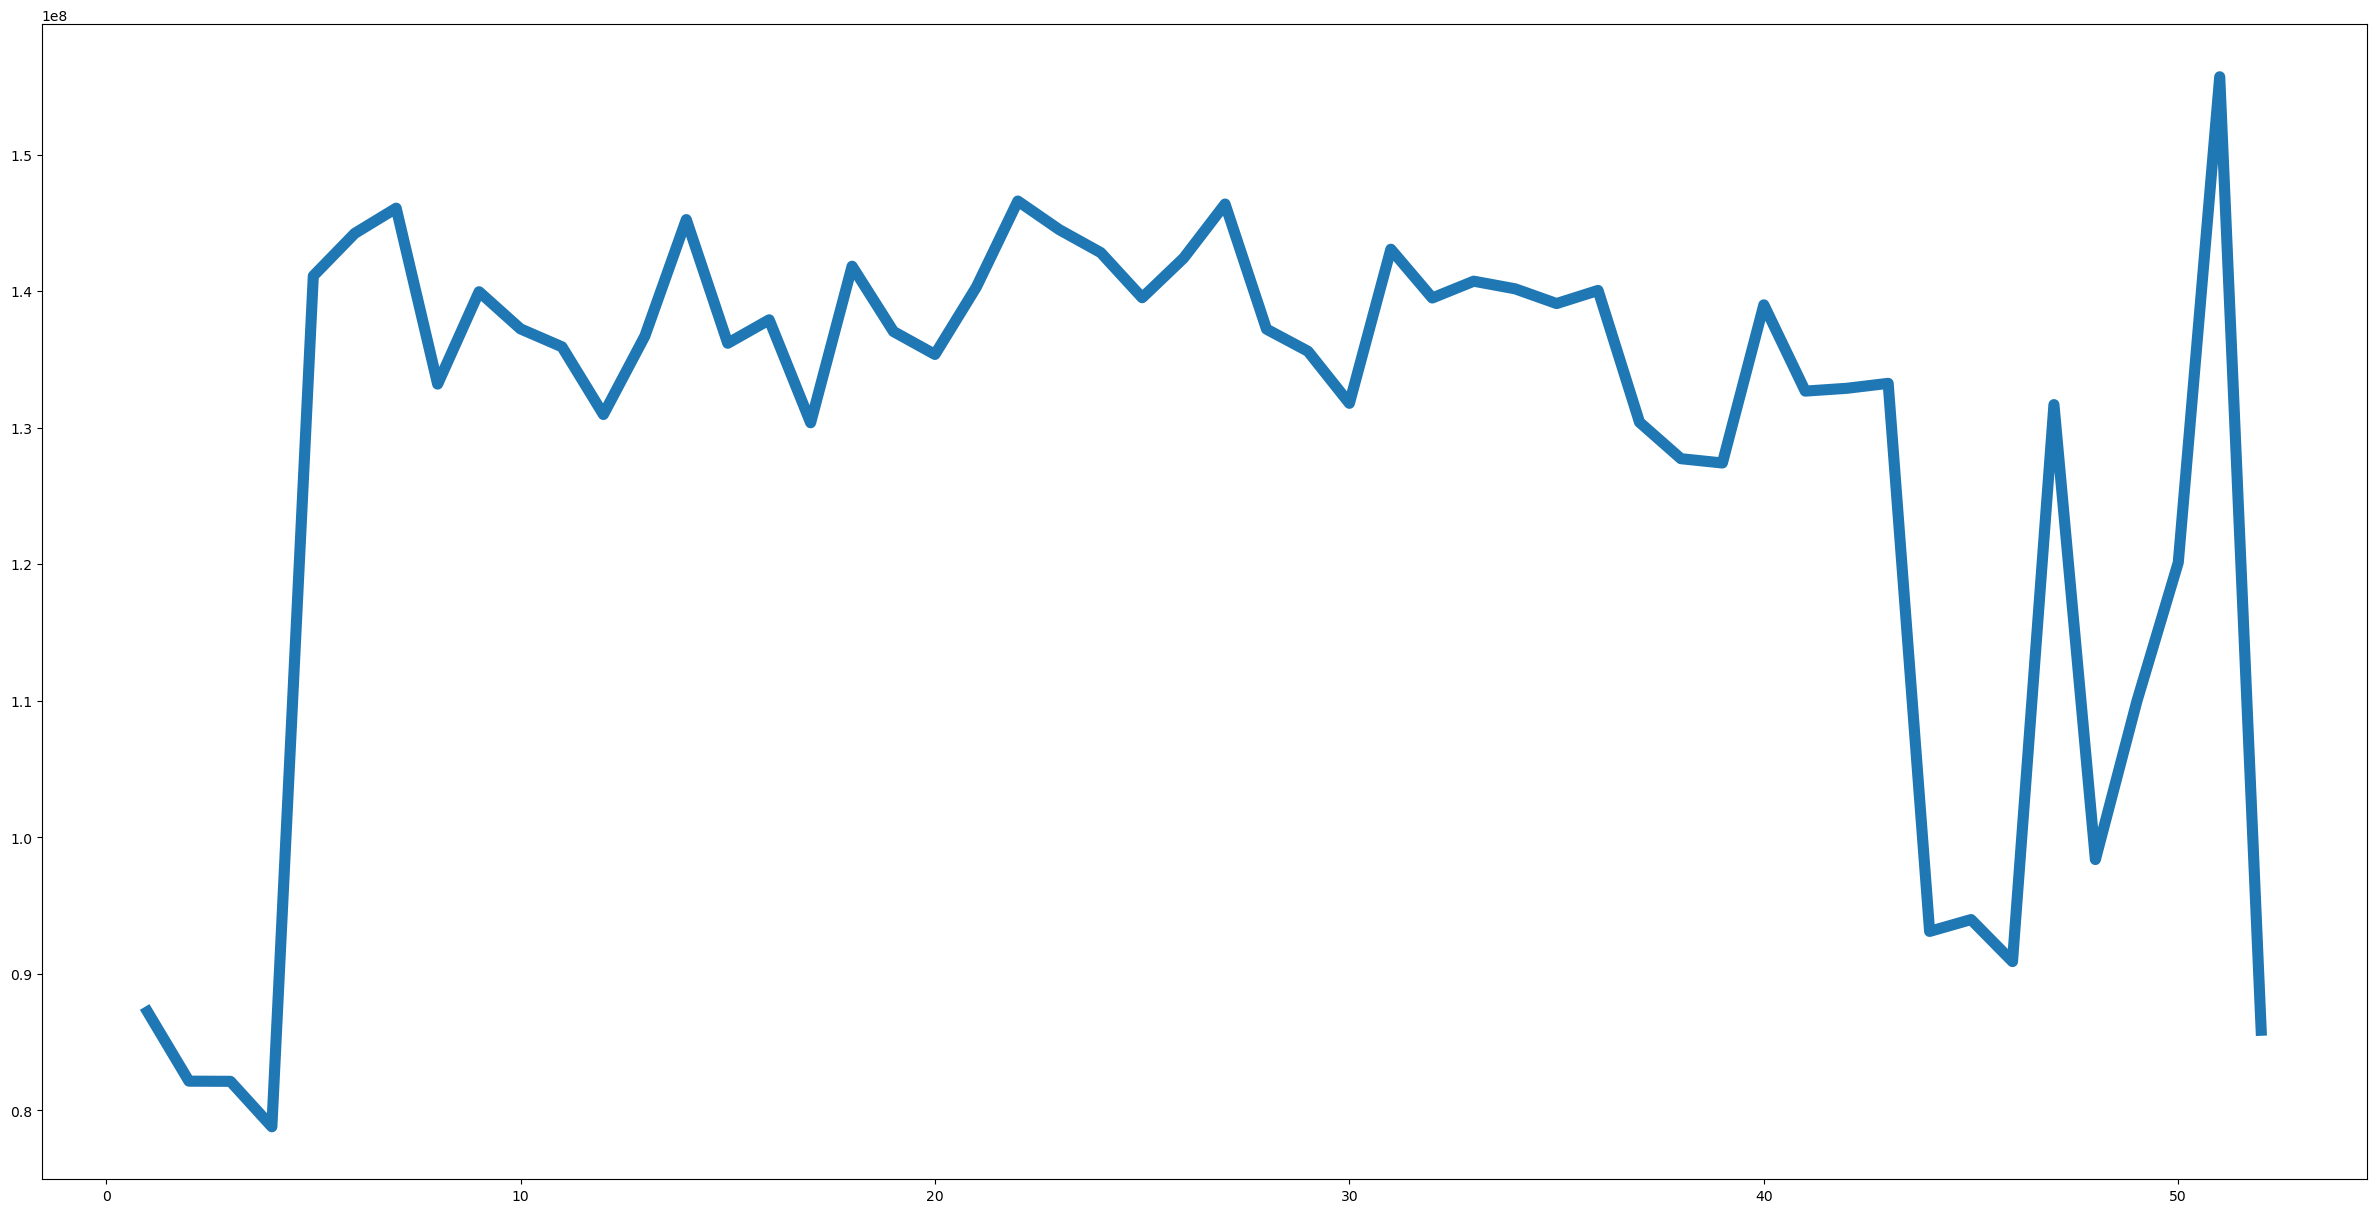

In [20]:
plt.plot(week_array,weekly_total_array,linewidth=8)
fig=plt.gcf()
fig.set_size_inches(30,15)
plt.show()

In [21]:
sales_dict = {}
for store in range (1,46):
    for dept in range (1,100):
        current_key = str(store) +"," + str(dept)
        sales_dict[current_key]=0

In [22]:
sales_dict


{'1,1': 0,
 '1,2': 0,
 '1,3': 0,
 '1,4': 0,
 '1,5': 0,
 '1,6': 0,
 '1,7': 0,
 '1,8': 0,
 '1,9': 0,
 '1,10': 0,
 '1,11': 0,
 '1,12': 0,
 '1,13': 0,
 '1,14': 0,
 '1,15': 0,
 '1,16': 0,
 '1,17': 0,
 '1,18': 0,
 '1,19': 0,
 '1,20': 0,
 '1,21': 0,
 '1,22': 0,
 '1,23': 0,
 '1,24': 0,
 '1,25': 0,
 '1,26': 0,
 '1,27': 0,
 '1,28': 0,
 '1,29': 0,
 '1,30': 0,
 '1,31': 0,
 '1,32': 0,
 '1,33': 0,
 '1,34': 0,
 '1,35': 0,
 '1,36': 0,
 '1,37': 0,
 '1,38': 0,
 '1,39': 0,
 '1,40': 0,
 '1,41': 0,
 '1,42': 0,
 '1,43': 0,
 '1,44': 0,
 '1,45': 0,
 '1,46': 0,
 '1,47': 0,
 '1,48': 0,
 '1,49': 0,
 '1,50': 0,
 '1,51': 0,
 '1,52': 0,
 '1,53': 0,
 '1,54': 0,
 '1,55': 0,
 '1,56': 0,
 '1,57': 0,
 '1,58': 0,
 '1,59': 0,
 '1,60': 0,
 '1,61': 0,
 '1,62': 0,
 '1,63': 0,
 '1,64': 0,
 '1,65': 0,
 '1,66': 0,
 '1,67': 0,
 '1,68': 0,
 '1,69': 0,
 '1,70': 0,
 '1,71': 0,
 '1,72': 0,
 '1,73': 0,
 '1,74': 0,
 '1,75': 0,
 '1,76': 0,
 '1,77': 0,
 '1,78': 0,
 '1,79': 0,
 '1,80': 0,
 '1,81': 0,
 '1,82': 0,
 '1,83': 0,
 '1,84': 0,
 

In [23]:
result = sm.ols(formula="Weekly_Sales ~ Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1) & (master_df['Dept'] == 1)]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.528
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.49e-06
Time:                        09:22:04   Log-Likelihood:                -1494.3
No. Observations:                 143   AIC:                             3013.
Df Residuals:                     131   BIC:                             3048.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9.032e-07   5.87e-06     -0.154      0.878   -1.25e-05    1.07e-05
Holiday[T.True]  -144.8330   3236.662     -0.045      0.964   -6547.722    6258.056
Fuel_Price       1821.3247   3268.271      0.557      0.578   -4644.094    8286.743
Temperature      -408.5091     61.686     -6.622      0.000    -530.539    -286.479
Size               -0.1367      0.888     -0.154      0.878      -1.893       1.620
MarkDown1           0.1410      0.288      0.490      0.625      -0.428       0.710
MarkDown2          -0.2022      0.186     -1.088      0.279      -0.570       0.166
MarkDown3          -0.1604      0.171     -0.937      0.351      -0.499       0.178
MarkDown4           0.0411      0.321      0.128      0.898      -0.594       0.676
MarkDown5          -0.5835      0.366     -1.592      0.114      -1.308       0.142
CPI               224.0355    555.419      0.403      0.687    -874.716    1322.787
Unemployment     1883.8868   3836.450      0.491      0.624   -5705.526    9473.299
Week_Number       129.3682     60.724      2.130      0.035       9.241     249.495
==============================================================================
Omnibus:                       73.825   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.640
Skew:                           2.014   Prob(JB):                     1.13e-56
Kurtosis:                       8.197   Cond. No.                     7.86e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
master_df = master_df.join(pd.get_dummies(master_df['Store'], prefix='Store'))
master_df = master_df.join(pd.get_dummies(master_df['Dept'], prefix='Dept'))
master_df = master_df.join(pd.get_dummies(master_df['Week_Number'], prefix='Week_Number'))


In [25]:
master_df.head()

Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  ...  Week_Number_43.0  Week_Number_44.0  \
0        0.0        0.0  ...                 0                 0   
1        0.0        0.0  ...                 0                 0   
2        0.0        0.0  ...                 0                 0   
3        0.0        0.0  ...                 0                 0   
4        0.0        0.0  ...                 0                 0   

   Week_Number_45.0  Week_Number_46.0  Week_Number_47.0  Week_Number_48.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Week_Number_49.0  Week_Number_50.0 Week_Number_51.0 Week_Number_52.0  
0                 0                 0                0                0  
1                 0                 0                0                0  
2                 0                 0                0                0  
3                 0                 0                0                0  
4                 0                 0                0                0  

[5 rows x 198 columns]

In [26]:
master_df.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.933000       0.000000       0.000000   
50%        62.090000       3.452000       0.000000       0.000000   
75%        74.280000       3.738000    2809.050000       2.200000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4  ...  Week_Number_43.0  Week_Number_44.0  \
count  421570.000000  421570.000000  ...     421570.000000     421570.000000   
mean      468.087665    1083.132268  ...          0.021005          0.013957   
std      5528.873453    3894.529945  ...          0.143400          0.117314   
min       -29.100000       0.000000  ...          0.000000          0.000000   
25%         0.000000       0.000000  ...          0.000000          0.000000   
50%         0.000000       0.000000  ...          0.000000          0.000000   
75%         4.540000     425.290000  ...          0.000000          0.000000   
max    141630.610000   67474.850000  ...          1.000000          1.000000   

       Week_Number_45.0  Week_Number_46.0  Week_Number_47.0  Week_Number_48.0  \
count     421570.000000     421570.000000     421570.000000     421570.000000   
mean           0.013979          0.013941          0.014135          0.014097   
std            0.117402          0.117245          0.118049          0.117892   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       Week_Number_49.0  Week_Number_50.0  Week_Number_51.0  Week_Number_52.0  
count     421570.000000     421570.000000     421570.000000     421570.000000  
mean           0.014133          0.014166          0.014192          0.014104  
std            0.118039          0.118175          0.118283          0.117922  
min            0.000000          0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000          0.000000  
75%            0.000000          0.000000          0.000000          0.000000  
max            1.000000          1.000000          1.000000          1.000000  

[8 rows x 193 columns]

In [33]:
store_col = [col for col in master_df if col.startswith("Store_")]
weeks_col = [col for col in master_df.columns if col.startswith("Week_Number_")]

col_rename_dict = {'Week_Number_1.0':'Week_Number_1','Week_Number_2.0':'Week_Number_2','Week_Number_3.0':'Week_Number_3','Week_Number_4.0':'Week_Number_4','Week_Number_5.0':'Week_Number_5',
                  'Week_Number_6.0':'Week_Number_6','Week_Number_7.0':'Week_Number_7','Week_Number_8.0':'Week_Number_8','Week_Number_9.0':'Week_Number_9','Week_Number_10.0':'Week_Number_10',
                  'Week_Number_11.0':'Week_Number_11','Week_Number_12.0':'Week_Number_12','Week_Number_13.0':'Week_Number_13','Week_Number_14.0':'Week_Number_14','Week_Number_15.0':'Week_Number_15',
                  'Week_Number_16.0':'Week_Number_16','Week_Number_17.0':'Week_Number_17','Week_Number_18.0':'Week_Number_18','Week_Number_19.0':'Week_Number_19','Week_Number_20.0':'Week_Number_20',
                  'Week_Number_21.0':'Week_Number_21','Week_Number_22.0':'Week_Number_22','Week_Number_23.0':'Week_Number_23','Week_Number_24.0':'Week_Number_24','Week_Number_25.0':'Week_Number_25',
                  'Week_Number_26.0':'Week_Number_26','Week_Number_27.0':'Week_Number_27','Week_Number_28.0':'Week_Number_28','Week_Number_29.0':'Week_Number_29','Week_Number_30.0':'Week_Number_30',
                  'Week_Number_31.0':'Week_Number_31','Week_Number_32.0':'Week_Number_32','Week_Number_33.0':'Week_Number_33','Week_Number_34.0':'Week_Number_34','Week_Number_35.0':'Week_Number_35',
                  'Week_Number_36.0':'Week_Number_36','Week_Number_37.0':'Week_Number_37','Week_Number_38.0':'Week_Number_38','Week_Number_39.0':'Week_Number_39','Week_Number_40.0':'Week_Number_40',
                  'Week_Number_41.0':'Week_Number_41','Week_Number_42.0':'Week_Number_42','Week_Number_43.0':'Week_Number_43','Week_Number_44.0':'Week_Number_44','Week_Number_45.0':'Week_Number_45',
                  'Week_Number_46.0':'Week_Number_46','Week_Number_47.0':'Week_Number_47','Week_Number_48.0':'Week_Number_48','Week_Number_49.0':'Week_Number_49','Week_Number_50.0':'Week_Number_50',
                  'Week_Number_51.0':'Week_Number_51','Week_Number_52.0':'Week_Number_52','Week_Number_53.0':'Week_Number_53','Week_Number_54.0':'Week_Number_54'}



master_df.rename(columns=col_rename_dict, inplace=True)


dept_col = [col for col in master_df if col.startswith("Dept_")]

equals_to_str=""
for i in range (len(store_col)):
    equals_to_str = equals_to_str + str(store_col[i]) + " + "
for i in range (len(weeks_col)):
    equals_to_str = equals_to_str + str(weeks_col[i])+ " + "
for i in range (len(dept_col)):
    equals_to_str = equals_to_str +str(dept_col[i]) + " + "

    
    
print(equals_to_str)

Store_1 + Store_2 + Store_3 + Store_4 + Store_5 + Store_6 + Store_7 + Store_8 + Store_9 + Store_10 + Store_11 + Store_12 + Store_13 + Store_14 + Store_15 + Store_16 + Store_17 + Store_18 + Store_19 + Store_20 + Store_21 + Store_22 + Store_23 + Store_24 + Store_25 + Store_26 + Store_27 + Store_28 + Store_29 + Store_30 + Store_31 + Store_32 + Store_33 + Store_34 + Store_35 + Store_36 + Store_37 + Store_38 + Store_39 + Store_40 + Store_41 + Store_42 + Store_43 + Store_44 + Store_45 + Week_Number_1 + Week_Number_2 + Week_Number_3 + Week_Number_4 + Week_Number_5 + Week_Number_6 + Week_Number_7 + Week_Number_8 + Week_Number_9 + Week_Number_10 + Week_Number_11 + Week_Number_12 + Week_Number_13 + Week_Number_14 + Week_Number_15 + Week_Number_16 + Week_Number_17 + Week_Number_18 + Week_Number_19 + Week_Number_20 + Week_Number_21 + Week_Number_22 + Week_Number_23 + Week_Number_24 + Week_Number_25 + Week_Number_26 + Week_Number_27 + Week_Number_28 + Week_Number_29 + Week_Number_30 + Week_Number_3

In [34]:
equals_to_str = "Weekly_Sales ~ " + equals_to_str + "Holiday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment"


In [29]:
master_df.loc[:,"Store_1"]

0         1
1         1
2         1
3         1
4         1
         ..
421565    0
421566    0
421567    0
421568    0
421569    0
Name: Store_1, Length: 421570, dtype: uint8

In [35]:
lis=list(master_df.columns)

In [36]:
if "Week_Number_22" in lis:
    print(2)
    

2


In [37]:
result = sm.ols(formula = equals_to_str, data=master_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     4511.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:24:56   Log-Likelihood:            -4.5974e+06
No. Observations:              421570   AIC:                         9.195e+06
Df Residuals:                  421385   BIC:                         9.197e+06
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3748.6821   1830.797     

In [38]:
prediction = result.predict()
actual = 

In [39]:
for i in range(len(prediction)):
    print(prediction[i])

27023.90311623817
27103.39349743953
27159.462406624716
25806.771178065734
26693.068750501032
26476.998024053202
26154.17990241208
25532.01258165354
26697.193938896387
27530.051270209864
26359.12900125296
26519.10862364612
25705.960994584308
27091.840779033053
26527.38048704141
26368.535771876912
26926.3123301468
27561.551091838617
27321.435626405837
27235.350980061474
26771.652304871666
26917.119841689484
27357.57159482971
26375.366228616786
26186.177261362634
25781.0765317424
27271.953134992633
26773.24603148853
26893.77085114951
26851.87701055348
26676.0261531091
26754.371569390307
25785.92842947958
25451.827777855826
25200.682703343064
26374.285932800783
25723.997502884726
25882.466945071737
26048.901228349783
26902.79965808119
26943.704749251265
26222.22505042901
32367.920064620914
27393.744852257478
29570.61585682403
31433.87995338162
37468.34464092199
25317.003424187544
25521.170889496905
24510.614287826465
24645.368807894225
24086.474971230204
27062.814569032038
27075.2265187250

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

